In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['day.csv', 'Readme.txt', 'hour.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display,HTML
import warnings
warnings.filterwarnings("ignore")


In [3]:
hour_df=pd.read_csv('../input/hour.csv')
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.shape

(17379, 17)

In [5]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
#In order to better understanding the attributes rename them
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month',
                        'cnt':'total_count','hr':'hour','yr':'year'},inplace=True)
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hour_df.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
#Type casting
#date time conversion
hour_df['datetime']=pd.to_datetime(hour_df.datetime)

#categorical variables
hour_df['season']=hour_df.season.astype('category')
hour_df['year']=hour_df.year.astype('category')
hour_df['month']=hour_df.month.astype('category')
hour_df['hour']=hour_df.hour.astype('category')
hour_df['is_holiday']=hour_df.is_holiday.astype('category')
hour_df['weekday']=hour_df.weekday.astype('category')
hour_df['is_workingday']=hour_df.is_workingday.astype('category')
hour_df['weather_condition']=hour_df.weather_condition.astype('category')


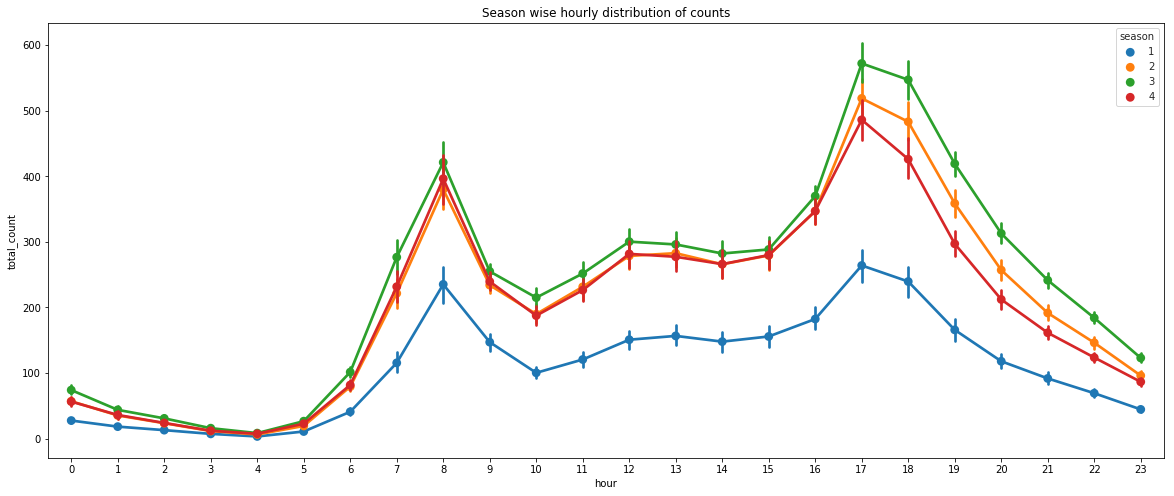

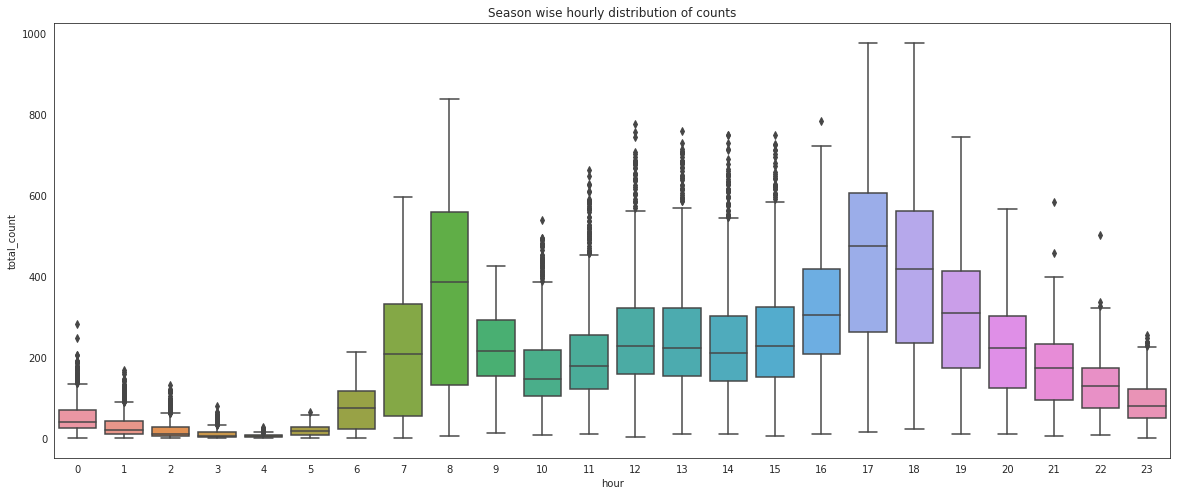

In [9]:
#Distribution and trends
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style('white')
#Season wise hourly distribution of counts
sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','season']],hue='season',ax=ax)
ax.set_title('Season wise hourly distribution of counts')
plt.show()
fig,ax1=plt.subplots(figsize=(20,8))
sns.boxplot(x='hour',y='total_count',data=hour_df[['hour','total_count']],ax=ax1)
ax1.set_title('Season wise hourly distribution of counts')
plt.show()

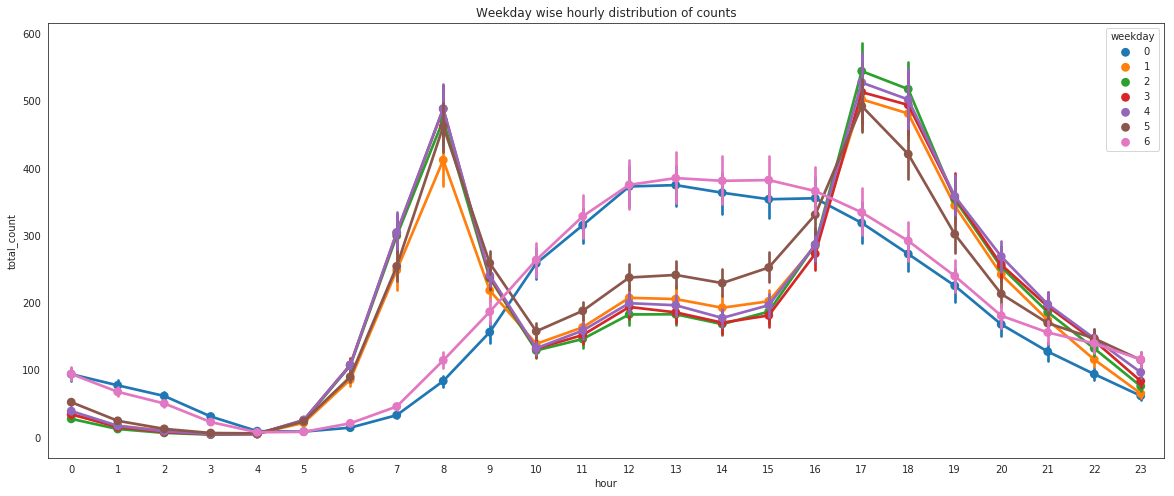

In [10]:
#Weekday wise hourly distribution of counts
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','weekday']],hue='weekday')
ax.set_title('Weekday wise hourly distribution of counts')
plt.show()

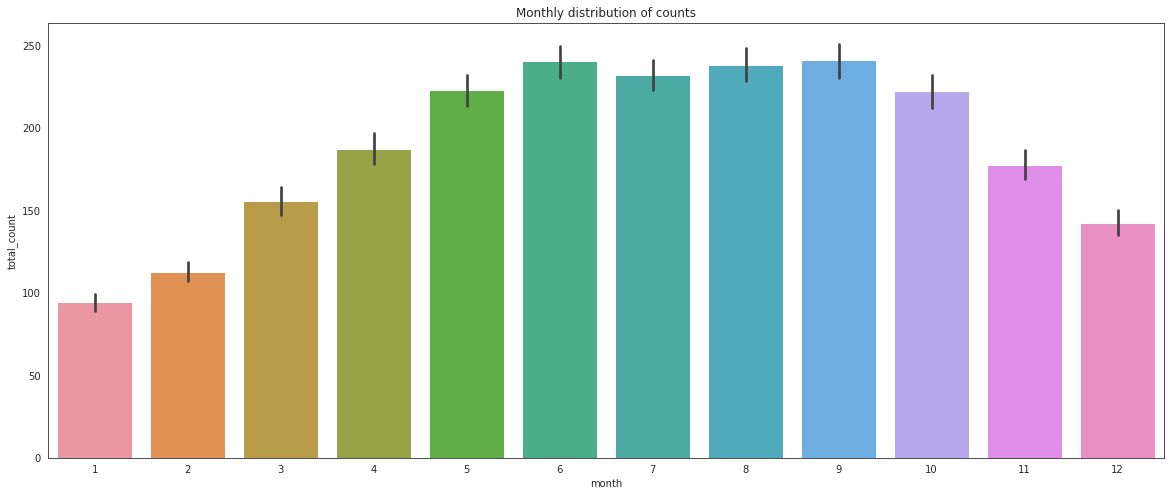

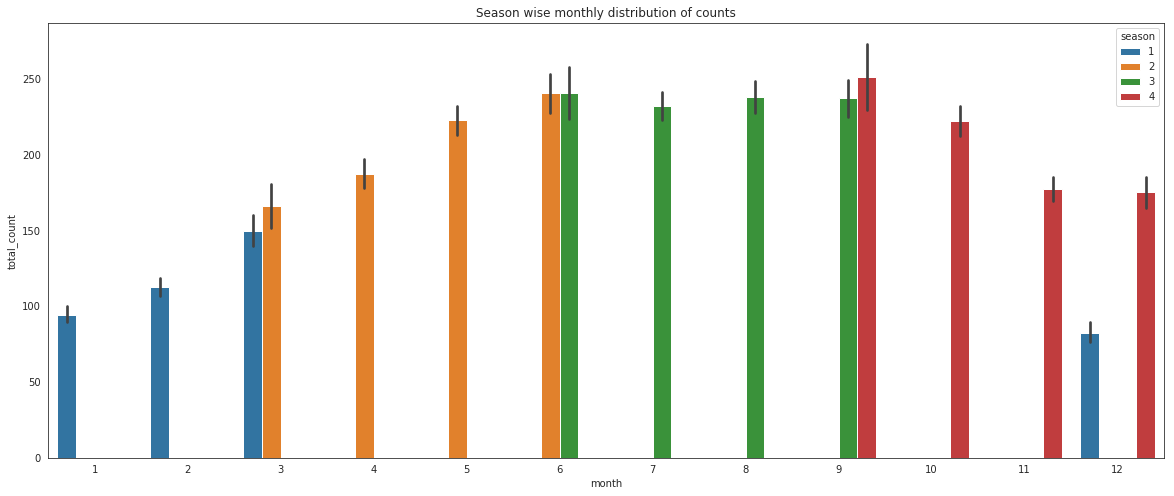

In [11]:
#Monthly distribution of counts
fig,ax1=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count']],ax=ax1)
ax1.set_title('Monthly distribution of counts')
plt.show()
fig,ax2=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count','season']],hue='season',ax=ax2)
ax2.set_title('Season wise monthly distribution of counts')
plt.show()

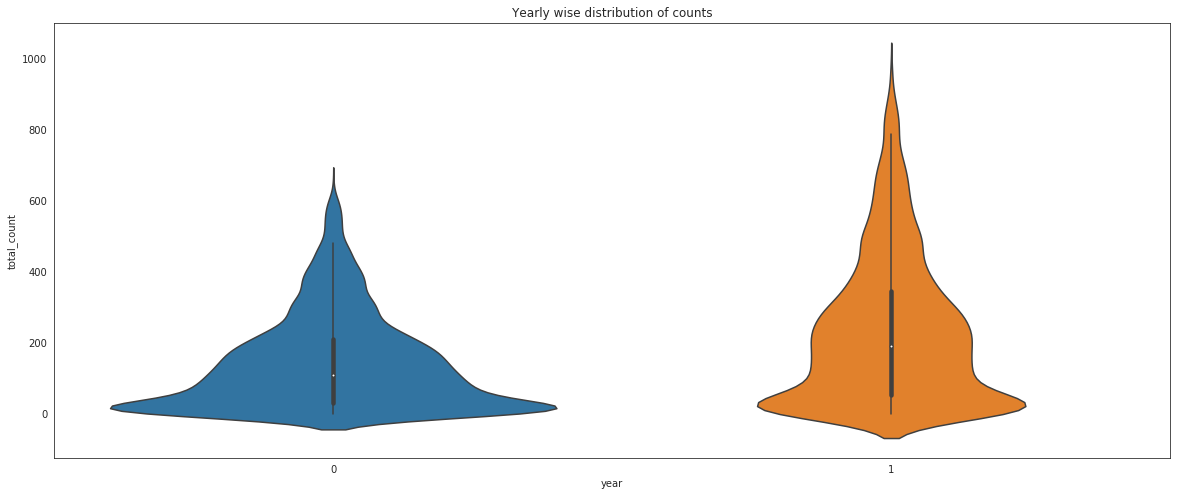

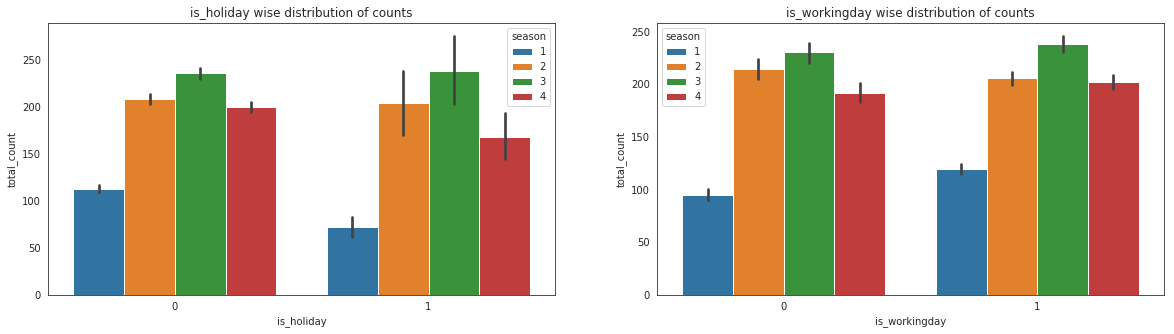

In [12]:
#Yearly wise distribution of counts
fig,ax=plt.subplots(figsize=(20,8))
sns.violinplot(x='year',y='total_count',data=hour_df[['year','total_count']])
ax.set_title('Yearly wise distribution of counts')
plt.show()
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
ax1.set_title('is_holiday wise distribution of counts')
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)
ax2.set_title('is_workingday wise distribution of counts')
plt.show()

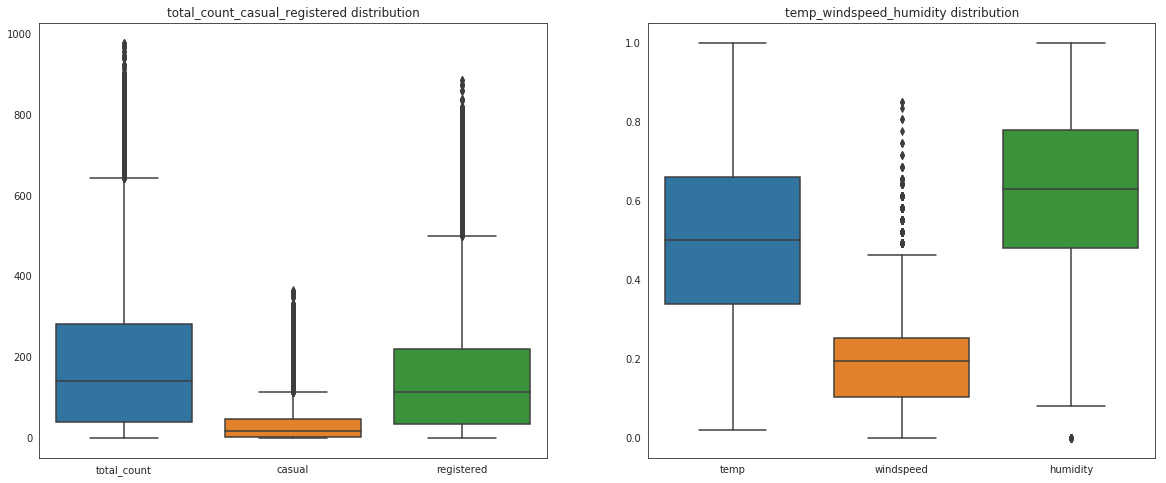

In [13]:
#Outliers distribution
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax1)
ax1.set_title('total_count_casual_registered distribution')
sns.boxplot(data=hour_df[['temp','windspeed','humidity']],ax=ax2)
ax2.set_title('temp_windspeed_humidity distribution')
plt.show()

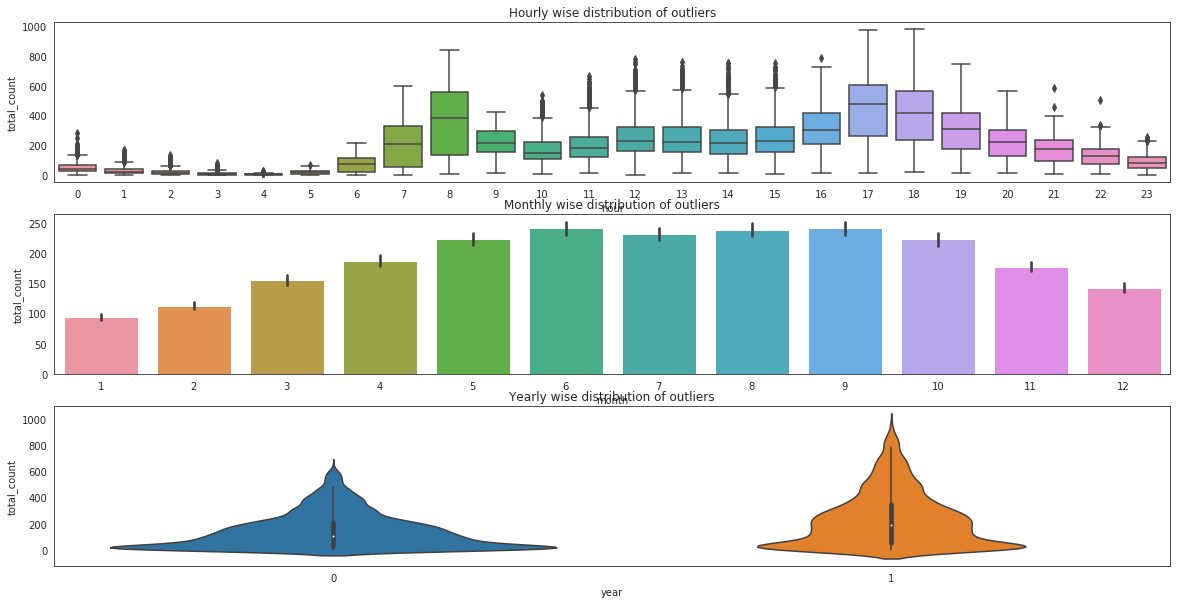

In [14]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,figsize=(20,10))
sns.boxplot(x='hour',y='total_count',data=hour_df[['hour','total_count','casual','registered']],ax=ax1)
ax1.set_title('Hourly wise distribution of outliers')

sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count','casual','registered']],ax=ax2)
ax2.set_title('Monthly wise distribution of outliers')

sns.violinplot(x='year',y='total_count',data=hour_df[['year','total_count','casual','registered']],ax=ax3)
ax3.set_title('Yearly wise distribution of outliers')
plt.show()

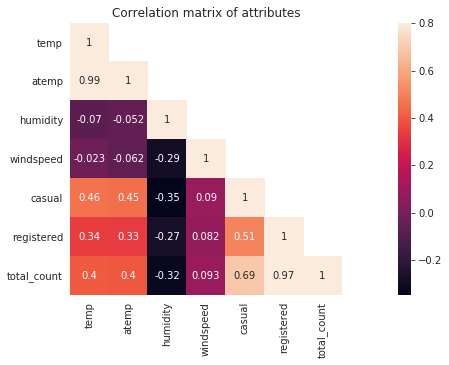

In [15]:
#Correlations(It helps us understand relationships between different attributes of the data.)
#Correlation matrix
correMtr=hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [16]:
#Regression analysis
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split


In [17]:
#train_test_split
X_train,X_test,y_train,y_test= train_test_split(hour_df.iloc[:,0:-3],hour_df['total_count'],test_size=0.3,random_state=42)

X_train=X_train.reset_index() 
y_train=y_train.reset_index()

X_test=X_test.reset_index() 
y_test=y_test.reset_index() 

print(X_train.shape,X_test.shape,y_train.shape)
print(y_train,y_test)

(12165, 15) (5214, 15) (12165, 2)
       index  total_count
0      11229            9
1       6334          209
2      11060           30
3      12346          644
4      15437          217
5       5598            8
6       9999          339
7       5957          360
8      14389          834
9      14131           88
10      5134          137
11      7479           23
12     16404          101
13     14930          545
14      8753          118
15      9113          156
16     15502           15
17     15595           49
18      2036          116
19      3065          217
20     13298          380
21     12799          254
22      5824           16
23      1041            1
24      5312            6
25     11032          276
26     15584          328
27      1413            1
28       114           19
29     11198          522
...      ...          ...
12135  14502          492
12136   8838            5
12137   3890           47
12138   3556            6
12139  11394           73
1214

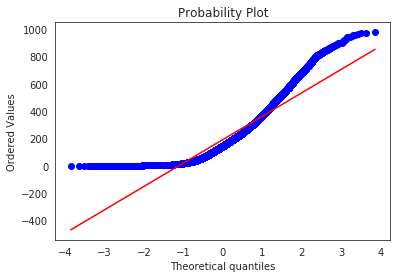

In [18]:
#Normality test
import scipy
from scipy import stats
stats.probplot(y_train.total_count.tolist(),dist='norm',plot=plt)
plt.show()

In [19]:
#Categorical and numerical features

training_features=X_train[['season','is_holiday','is_workingday','weather_condition','hour','month','year','weekday','temp','atemp','humidity','windspeed']]
categorical_features=['season','is_holiday','is_workingday','weather_condition']
numerical_features=[['temp','atemp','humidity','windspeed','hour','month','year','weekday']]

In [20]:
#decoding the features
training_attributes=pd.get_dummies(training_features,columns=categorical_features)
training_attributes.head()

,hour,month,year,weekday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,2,4,1,3,0.50,0.4848,0.42,0.1940,0,1,0,0,1,0,0,1,0,1,0,0
1,12,9,0,1,0.68,0.6364,0.79,0.1642,0,0,0,1,1,0,0,1,0,1,0,0
2,0,4,1,3,0.34,0.3030,0.36,0.4179,0,1,0,0,1,0,0,1,1,0,0,0
3,15,6,1,0,0.70,0.6364,0.34,0.0000,0,1,0,0,1,0,1,0,1,0,0,0
4,10,10,1,3,0.56,0.5303,0.52,0.2985,0,0,0,1,1,0,0,1,1,0,0,0


In [21]:
#Linear regression
X_train=training_attributes
y_train=y_train.total_count.values
lr=linear_model.LinearRegression()

model=lr.fit(X_train,y_train)


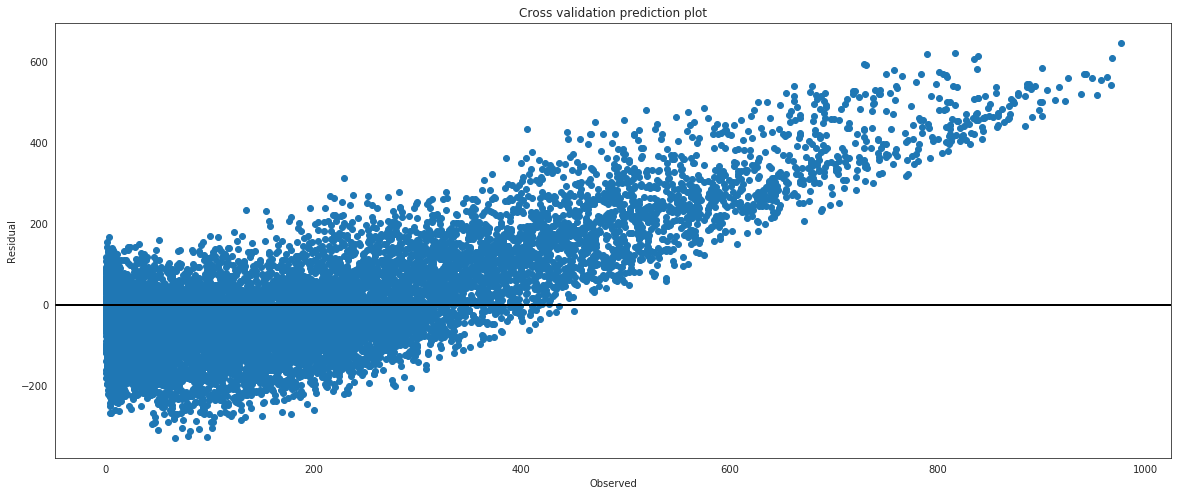

In [22]:
#cross_validation_prediction
predict=cross_val_predict(lr,X_train,y_train,cv=10)

fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()
#From the beow figure we can observed that it vialtes the homoscedasticity assumption and it is nothing but if all the random variables
#in the sequence or vector have the same finite variance 

In [23]:
#model evalution metrics
#R-squared and mean squared error scores
r2_scores = cross_val_score(lr, X_train, y_train, cv=10)
mse_scores = cross_val_score(lr, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
print(r2_scores)
print(mse_scores) 

[0.41302101 0.37524055 0.38061952 0.38680826 0.41183201 0.4174209
 0.38675382 0.38210728 0.39897824 0.40826086]
[-20328.86611941 -20392.86676583 -19153.15746863 -19399.38507362
 -18361.11887065 -21178.26879031 -20702.02506848 -22090.07615307
 -21187.36648662 -18967.30419327]


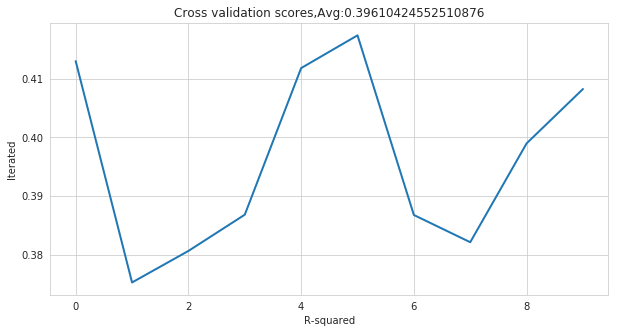

In [24]:
#Cross validation scores
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(10,5))
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2 )
ax.set_xlabel('R-squared')#coefficeint of determination
ax.set_ylabel('Iterated')
ax.set_title('Cross validation scores,Avg:{}'.format(np.average(r2_scores)))
plt.show()
#The r-squared or the coefficient of determination is 0.39 on an average for 10-fold cross validation and this
#points to the fact that the predictor is only able to explain 39% of the variance in the target variable.

In [25]:
#Test data performance
test_features= X_test[['season','is_holiday','weather_condition','is_workingday','hour','weekday','month','year','temp','atemp','humidity','windspeed']]
numeric_features = ['temp','humidity','windspeed','hour','weekday','month','year']
test_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

test_attributes=pd.get_dummies(test_features,columns=test_cat_features)
test_attributes.head()

,hour,weekday,month,year,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,19,6,6,1,0.80,0.6970,0.27,0.1940,0,0,1,0,1,0,1,0,0,0,1,0
1,20,1,1,1,0.24,0.2273,0.41,0.2239,1,0,0,0,0,1,1,0,0,0,1,0
2,2,5,10,0,0.32,0.3030,0.66,0.2836,0,0,0,1,1,0,1,0,0,0,0,1
3,19,2,5,1,0.78,0.7121,0.52,0.3582,0,1,0,0,1,0,1,0,0,0,0,1
4,0,4,1,0,0.26,0.2273,0.56,0.3881,1,0,0,0,1,0,1,0,0,0,0,1


In [26]:
#Prediction
X_test=test_attributes
y_test=y_test.total_count.values
y_pred=lr.predict(X_test)

In [27]:
#Model evaluation metrics
r2_score=lr.score(X_test,y_test)#R-squared score
mse_score=metrics.mean_squared_error(y_test,y_pred)#mean squared error
print(r2_score)
print(mse_score)

-10.600416070391864
366466.89689740725


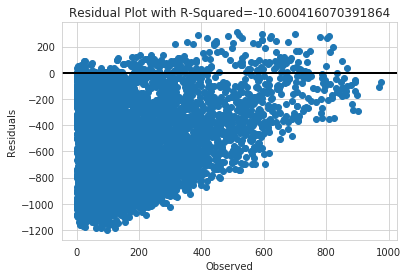

In [28]:
#Residual plot
ig, ax = plt.subplots()
ax.scatter(y_test, y_test-y_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

In [29]:
# From the above analysis we can conclude that the linear regression model not suitable for this problem due to non linerity of data.
#Decision tree Regressor
X_train=training_attributes
#y_train=y_train.total_count.values
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
dtr=DecisionTreeRegressor(max_depth=8,min_samples_split=10,max_leaf_nodes=20)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
dtr.score(X_train,y_train)

0.731170918106748

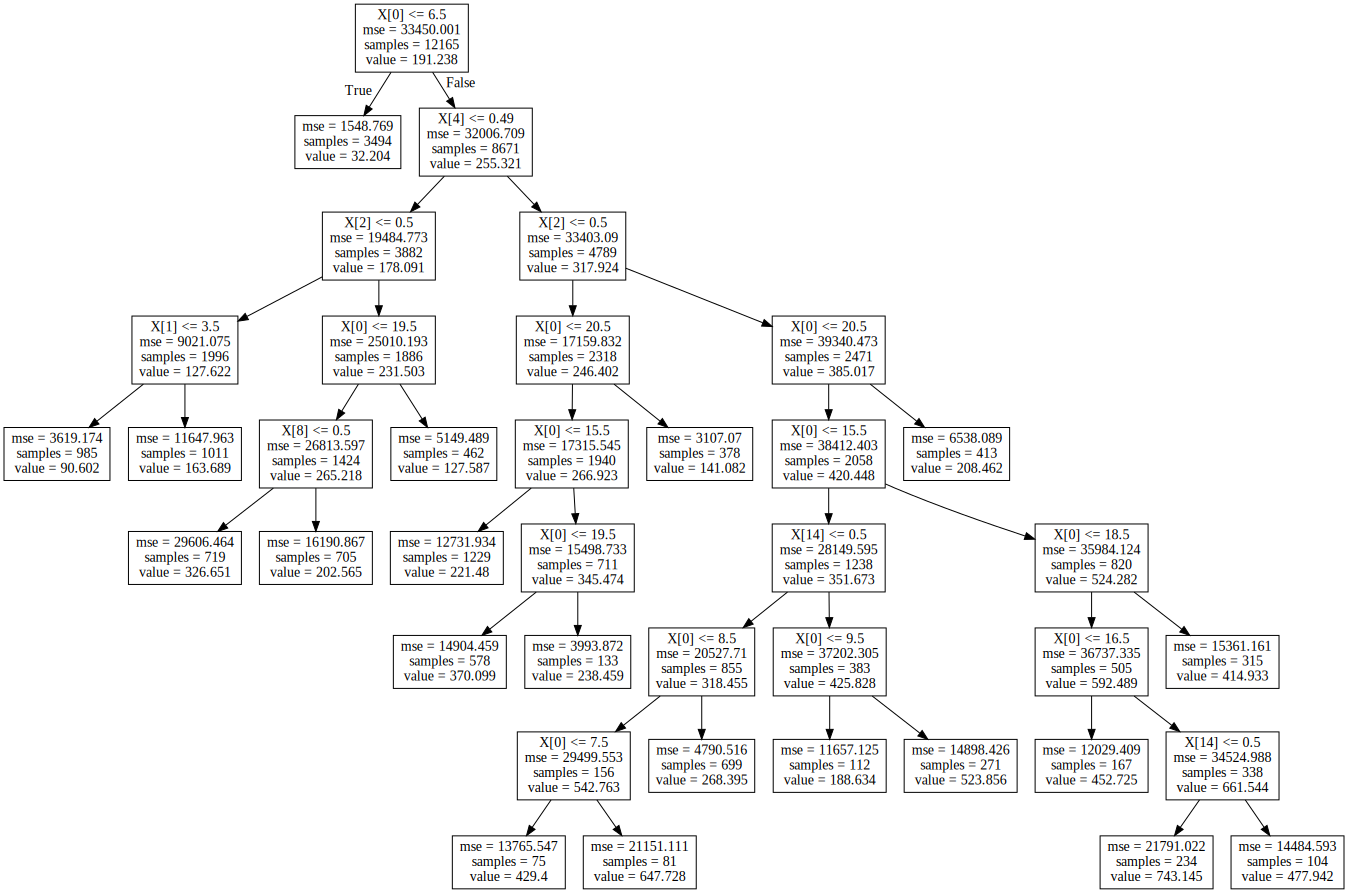

In [31]:
#plot the learned model
from sklearn import tree
import pydot
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [32]:
#Randomized search cv with cross validation
from scipy.stats import randint as sp_randint
param_random = {"criterion": ["mse", "mae"],
              "min_samples_split": sp_randint(1, 5, 10),
              "max_depth": [2, 6, 8],
              "min_samples_leaf": sp_randint(5, 10,20),
              "max_leaf_nodes": sp_randint( 10, 20, 40),
              }

In [33]:
X_train=training_attributes
#y_train=y_train.total_count.values.reshape(-1,1)
randomized_cv_dtr = RandomizedSearchCV(dtr, param_random, cv=5)

randomized_cv_dtr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['mse', 'mae'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0ad342208>, 'max_depth': [2, 6, 8], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0ad192cf8>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc0ad1b3f98>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [34]:
#Cross validation and best model details
print(randomized_cv_dtr.best_score_)
print(randomized_cv_dtr.best_params_)

0.8209610655485117
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 51, 'min_samples_leaf': 25, 'min_samples_split': 12}


In [35]:
df=pd.DataFrame(data=randomized_cv_dtr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031621,0.000972,0.004393,0.000067,mse,8,51,27,11,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf...",0.809292,0.815866,0.833350,0.813845,0.831365,0.820744,0.009739,2,0.838192,0.839911,0.831717,0.832323,0.833323,0.835093,0.003317
1,3.379727,0.037423,0.004579,0.000076,mae,8,53,26,12,"{'criterion': 'mae', 'max_depth': 8, 'max_leaf...",0.802963,0.793653,0.812972,0.807227,0.833304,0.810024,0.013239,4,0.809388,0.811113,0.809084,0.827597,0.823233,0.816083,0.007774
2,0.030419,0.000435,0.004656,0.000336,mse,6,56,27,14,"{'criterion': 'mse', 'max_depth': 6, 'max_leaf...",0.778871,0.767660,0.770876,0.774227,0.779339,0.774195,0.004518,6,0.800213,0.792527,0.784801,0.786423,0.788804,0.790554,0.005485
3,0.021213,0.000266,0.004398,0.000043,mse,2,56,29,11,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.492399,0.494901,0.488199,0.480547,0.498987,0.491006,0.006294,9,0.496515,0.491968,0.497472,0.498675,0.494770,0.495880,0.002336
4,0.032229,0.000429,0.004789,0.000189,mse,8,51,25,12,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf...",0.811827,0.815866,0.831902,0.813845,0.831365,0.820961,0.008809,1,0.838218,0.839911,0.831932,0.832323,0.833323,0.835141,0.003279


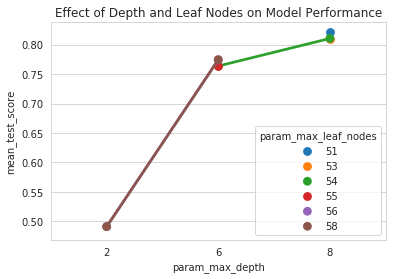

In [36]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")
plt.show()

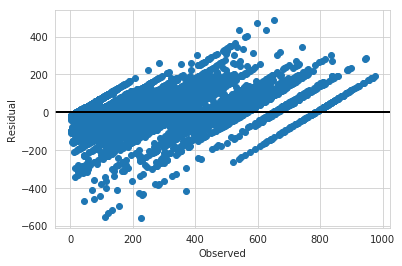

In [37]:
#Residual plot
predicted = randomized_cv_dtr.best_estimator_.predict(X_train)
residuals = y_train.flatten()-predicted
fig, ax = plt.subplots()
ax.scatter(y_train.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [38]:
#R-squared and mean squared error scores
r2_scores = cross_val_score(randomized_cv_dtr.best_estimator_, X_train, y_train, cv=10)
print(r2_scores)
mse_scores = cross_val_score(randomized_cv_dtr.best_estimator_, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
print(mse_scores)

[0.83972477 0.79794261 0.80000617 0.82768892 0.8182308  0.84672145
 0.82225413 0.8109597  0.85040448 0.80877031]
[-5550.81828555 -6595.38554653 -6184.42709071 -5451.36017395
 -5674.37528412 -5572.07465249 -6000.36262695 -6758.31670068
 -5273.57808366 -6129.57891197]


In [39]:
#Setting the model for Testing
X_test=test_attributes
#y_test=y_test.total_count.values.reshape(-1,1)
best_dtr_model = randomized_cv_dtr.best_estimator_
y_pred = best_dtr_model.predict(X_test)
residuals = y_test.flatten()- y_pred

In [40]:
#R-squared and mean squared error scores
r2_score = best_dtr_model.score(X_test,y_test)
print(r2_score)
mse_score=metrics.mean_squared_error(y_test,y_pred)
print(mse_score)

0.2534232806998039
23584.986258906436


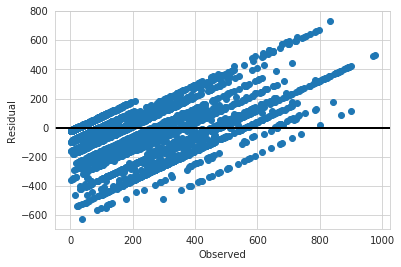

In [41]:
#Residual plot
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()
